Let's import the previous dataset.

In [0]:
import pandas as pd
import numpy as np

In [45]:
names = ['mpg', 'cylinders','displacement', 'horsepower', 
         'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                 'auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

df1 = df[['mpg','horsepower']]
df2 = df1.dropna()

x = np.array(df2['horsepower'])
y = np.array(df2['mpg'])
np.mean(x)

104.46938775510205

Basic plotting as sanity check.

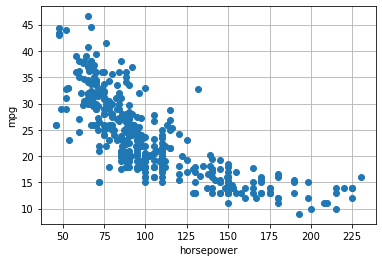

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'o')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)

In [47]:
xm = np.mean(x)
ym = np.mean(y)
sxx = np.mean((x-xm)**2)
syy = np.mean((y-ym)**2)
syx = np.mean((y-ym)*(x-xm))

beta1 = syx/sxx
beta0 = ym - beta1*xm

print("xbar={0:.2f},ybar={1:.2f}".format(xm,ym))
print("sqrt(xx)={0:.2f},sqrt(yy)={1:.2f}".format(np.sqrt(sxx),np.sqrt(syy)))
print("beta0={0:.2f},beta1={1:.2f}".format(beta0,beta1))

xbar=104.47,ybar=23.45
sqrt(xx)=38.44,sqrt(yy)=7.80
beta0=39.94,beta1=-0.16


Let's see how the regression model works.

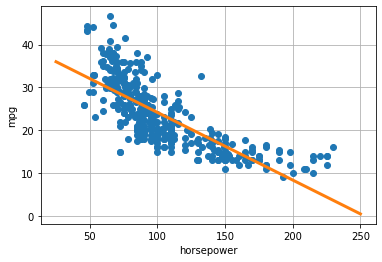

In [48]:
xmodel = np.array([25,250])
ymodel = beta0 + beta1*xmodel

plt.plot(x,y,'o')
plt.plot(xmodel,ymodel,'-',linewidth=3)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)

In [49]:
yhat = beta0 + beta1*x
SSE = np.mean((y - yhat)**2)
print(SSE)

23.943662938603108


Decent...but can we do better? There seems to be a 1/x type dependence. Let's test it to see if it gives lower error.

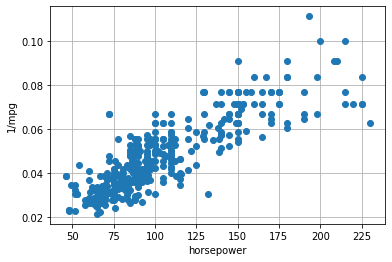

In [50]:
z = 1/y
plt.plot(x,z,'o')
plt.xlabel('horsepower')
plt.ylabel('1/mpg')
plt.grid(True)

Looks linear! Let's fit a linear model between x and z.

In [51]:
xm = np.mean(x)
zm = np.mean(z)
sxx = np.mean((x-xm)**2)
szz = np.mean((z-zm)**2)
szx = np.mean((z-zm)*(x-xm))

beta1 = szx/sxx
beta0 = zm - beta1*xm

print([beta0,beta1])

[0.009218138877684919, 0.00036952728304329803]


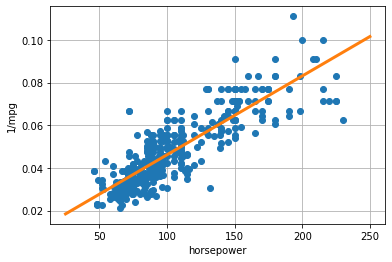

In [52]:
xmodel = np.array([25,250])
zmodel = beta0 + beta1*xmodel

plt.plot(x,z,'o')
plt.plot(xmodel,zmodel,'-',linewidth=3)
plt.xlabel('horsepower')
plt.ylabel('1/mpg')
plt.grid(True)

Maybe it helps to visualize on the original mpg data (instead of the inverse?) Let's check.

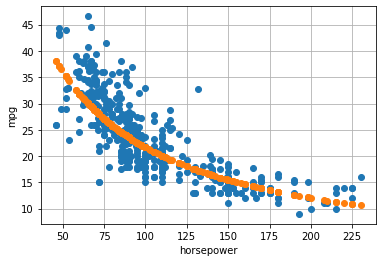

In [53]:
zhat = beta0 + beta1*x
yhat_inv = 1/zhat

plt.plot(x,y,'o')
plt.plot(x,yhat_inv,'o')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)

Great! Let's now check error.

In [54]:
SSE_inv = np.mean((y - yhat_inv)**2)

print("MSE = {0:.2f} (linear)".format(SSE))
print("MSE_inv = {0:.2f} (linear+inversion)".format(SSE_inv))

MSE = 23.94 (linear)
MSE_inv = 20.66 (linear+inversion)


One example with multivariate? Let's try it. This will also be an introduction to sklearn. 

In [55]:
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

samp, natt = X.shape
print(samp)
print(natt)

442
10


In [56]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

regr.intercept_


152.1334841628965

In [57]:
regr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [59]:
y_pred = regr.predict(X)
RSS = np.mean((y_pred-y)**2)/(np.std(y)**2)
Rsq = 1-RSS
print("RSS per sample = {0:f}".format(RSS))
print("R^2 =            {0:f}".format(Rsq))

RSS per sample = 0.482251
R^2 =            0.517749
